In [1]:
# Feature scaling is a technique to standardize the independent features present int the data in a fixed range
# It is of two types- 1.Standardization(Z-score normalization) , 2. Normalization


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df = df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
331,48,119000,1
50,24,32000,0
218,46,96000,0
59,32,117000,0
240,42,149000,1


# train-test-split

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop('Purchased', axis=1)
y = df['Purchased']

In [6]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=45, test_size=0.3)

In [7]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

# StandardScaler

In [8]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

# fit the scaler to the train set, it will learn the parameter
scaler.fit(X_train) # Always fit only training dataset

# transform train and test set - Always transform both training as well as testing dataset
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [9]:
scaler.mean_

array([3.75892857e+01, 7.03892857e+04])

In [10]:
X_train

,Age,EstimatedSalary
108,26,86000
101,28,59000
295,36,63000
192,29,43000
13,32,18000
...,...,...
213,35,58000
95,35,44000
32,21,16000
380,42,64000


In [11]:
X_train_scaled

array([[-1.15143231,  0.4494971 ],
       [-0.95272597, -0.32794469],
       [-0.15790058, -0.21276813],
       [-0.85337279, -0.78865094],
       [-0.55531327, -1.50850445],
       [-0.35660693, -0.78865094],
       [ 0.93498433, -0.58709196],
       [-0.05854741,  0.04637913],
       [-1.15143231, -1.56609273],
       [ 0.14015894,  0.19034984],
       [-0.55531327,  1.86040998],
       [-0.25725375,  0.19034984],
       [-0.25725375, -1.45091617],
       [-0.05854741, -0.50070953],
       [-0.25725375,  0.24793812],
       [ 1.23304385, -0.99020992],
       [-0.15790058,  2.11955724],
       [-0.05854741,  0.01758499],
       [ 2.22657558,  0.91020335],
       [-0.35660693,  1.28452717],
       [ 2.02786924,  2.11955724],
       [ 1.63045654, -0.01120915],
       [-0.25725375,  0.50708538],
       [ 1.0343375 ,  0.7374385 ],
       [ 0.23951211, -0.15517985],
       [-1.05207914,  0.50708538],
       [ 0.14015894,  1.83161584],
       [ 0.93498433, -0.78865094],
       [ 1.13369068,

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [13]:
np.round(X_train_scaled.describe(),1) # As you can see mean = 0 and std = 1 which shows that our data is Scaled

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.2,2.3


In [14]:
np.round(X_test_scaled.describe(),1) # Here, you can see mean !=0 and std !=0 but it is scaled , it means that mean and std 
                                     # criteria is valid for only train dataset not for test dataset
                                     

,Age,EstimatedSalary
count,120.0,120.0
mean,0.0,-0.1
std,1.1,0.9
min,-1.9,-1.5
25%,-0.9,-0.8
50%,0.0,-0.1
75%,0.9,0.5
max,2.2,2.2


# Effect of Scaling


Text(0.5, 1.0, 'After Scaling')

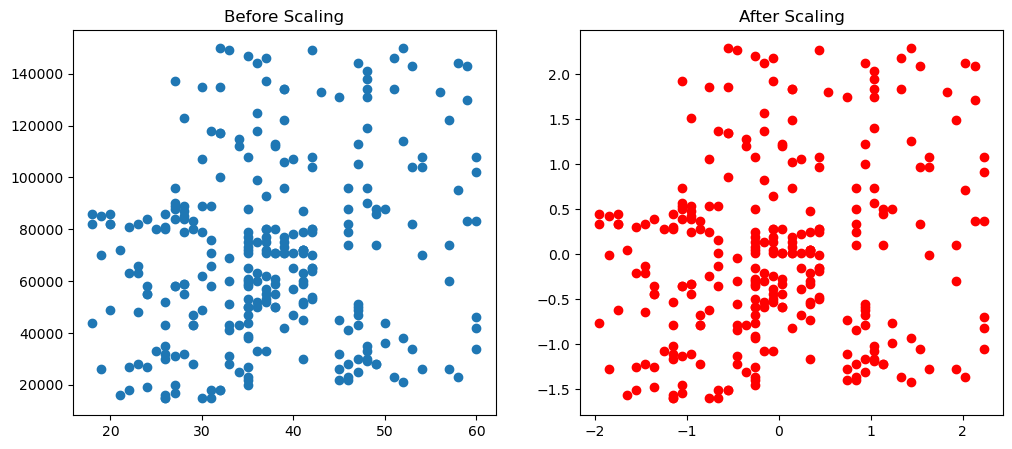

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(x=X_train['Age'], y = X_train['EstimatedSalary'])
plt.title('Before Scaling')
plt.subplot(1,2,2)
plt.scatter(x = X_train_scaled['Age'], y= X_train_scaled['EstimatedSalary'], color = "red")
plt.title('After Scaling')
# Here we can see that there is no change in relative position of data it looks exactly same the difference is that i) the
# data is now scaled ,ii) mean is zero

Text(0.5, 1.0, 'Before Scaling')

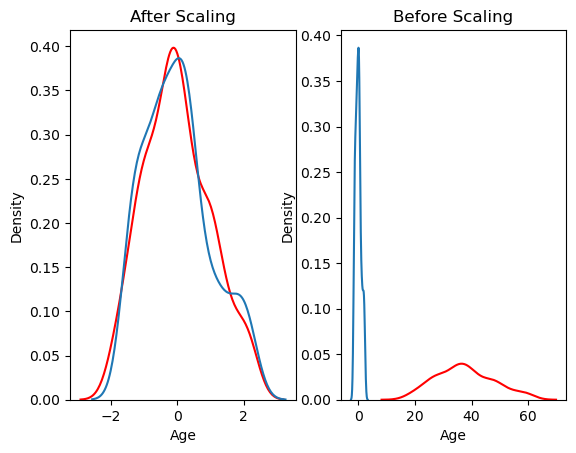

In [16]:
plt.subplot(1,2,1)
sns.kdeplot(X_train_scaled['Age'], color= 'red')
sns.kdeplot(X_train_scaled['EstimatedSalary'])
plt.title("After Scaling")
plt.subplot(1,2,2)
sns.kdeplot(X_train['Age'], color= 'red')
sns.kdeplot(X_train_scaled['EstimatedSalary'])
plt.title('Before Scaling')

#Comparision of Scaling

Text(0.5, 1.0, 'Distribution of Age after Scaling')

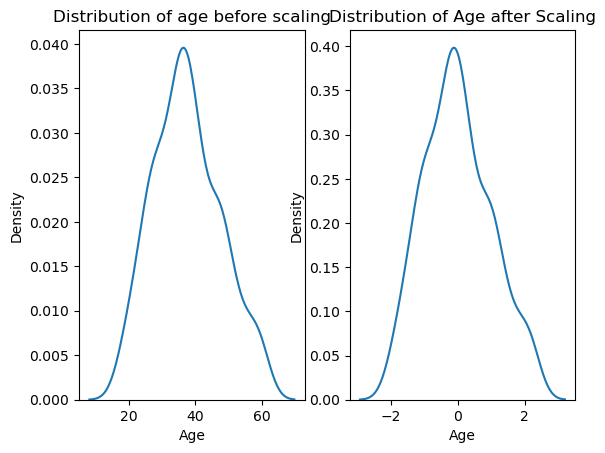

In [17]:
plt.subplot(1,2,1)
# before scaling
sns.kdeplot(X_train['Age'])
plt.title("Distribution of age before scaling")
# After Scaling
plt.subplot(1,2,2)
sns.kdeplot(X_train_scaled['Age'])
plt.title('Distribution of Age after Scaling') # Distribution is retained as we can see only scale is changed 

# Why scaling is important?

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_scaled = LinearRegression()

In [19]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)


In [23]:
from sklearn.metrics import accuracy_score # Let's leave it here , we will come back afer completing The linear regression

accuracy_score(y_test,y_pred)
accuracy_score(y_test_scaled,y_pred_scaled)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt.predict(X_test_scaled)

In [ ]:
print(accuracy_score(y_test,y_pred))
accuracy_score(y_test, y_pred_scaled)

0.8


0.6166666666666667